# Model Performance and Comparison

To measure the performance of a model, we need several elements

**Confusion matrix** : also known as the error matrix, allows visualization of the performance of an algorithm

    True Positive (TP) : Diabetic correctly identified as diabetic
    True Negative (TN) : Healthy correctly identified as healthy
    False Positive (FP) : Healthy incorrectly identified as diabetic
    False Negative (FN) : Diabetic incorrectly identified as healthy

**Metrics**

    Accuracy : (TP + TN) / (TP + TN + FP +FN)
    Precision : TP / (TP + FP)
    Recall : TP / (TP + FN)
    F1 score : 2 x ((Precision x Recall) / (Precision + Recall))

**Roc Curve** : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

**Precision Recall Curve** :  Shows the tradeoff between precision and recall for different threshold

### 1.1. Load libraries

Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')

Setting the default values for plots

In [2]:
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('figure', titlesize=35)
plt.rc('legend', fontsize=12)

### 1.2. Read data

Reading the data with pandas

In [3]:
df=pd.read_csv('diabetes_new.csv')

## 2. Overview

### 2.1. Head

Checking data head

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### 2.2. Splitting Dataset

Splitting the target variable in y and all the other features in X

In [5]:
X = df.drop('Outcome',axis=1)
y = df.Outcome

## 3. Machine Learning

We will train out data on different machine learning models and use different techniques on each model and then compare our finding at the end to determine which model is working best for out data.

In [6]:
avg_accuracies={}
accuracies={}
roc_auc={}
pr_auc={}

In [7]:
def cal_score(name,model,folds):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    avg_result=[]
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = folds, scoring = sc)
        avg_result.append(np.average(scores))
    df_avg_score=pd.DataFrame(avg_result)
    df_avg_score= df_avg_score.rename(index={0: 'Accuracy', 1:'Precision', 2:'Recall',3:'F1 score',4:'Roc auc'},columns={0:'Average'})
    avg_accuracies[name]=np.round(df_avg_score.loc['Accuracy']*100,3)
    values=[np.round(df_avg_score.loc['Accuracy']*100,3),np.round(df_avg_score.loc['Precision']*100,3),np.round(df_avg_score.loc['Recall']*100,3),np.round(df_avg_score.loc['F1 score']*100,3),np.round(df_avg_score.loc['Roc auc']*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('mako')
    ax=sns.barplot(x=['Accuracy','Precision','Recall','F1 score','Roc auc'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameters',labelpad=10)
    plt.title('Cross Validation '+str(folds)+'-Folds Average Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()

In [8]:
def conf_matrix(ytest,pred):
    plt.figure(figsize=(9,6))
    global cm1
    cm1 = confusion_matrix(ytest, pred)
    ax=sns.heatmap(cm1, annot= True, cmap='Blues')
    plt.title('Confusion Matrix',pad=20)

In [9]:
def metrics_score(cm):
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    specificity = cm[0,0]/(cm[0,1]+cm[0,0])
    values=[np.round(accuracy*100,3),np.round(precision*100,3),np.round(sensitivity*100,3),np.round(f1*100,3),np.round(specificity*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('magma')
    ax=sns.barplot(x=['Accuracy','Precision','Recall','F1 score','Specificity'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameter',labelpad=10)
    plt.title('Metrics Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()

In [10]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='Orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.ylabel('True Positive Rate',labelpad=10)
    plt.xlabel('False Positive Rate',labelpad=10)
    plt.title('Receiver Operating Characteristic (ROC) Curve',pad=20)
    plt.legend()
    plt.show()

In [11]:
def plot_precision_recall_curve(recall, precision):
    plt.figure(figsize=(8,6))
    plt.plot(recall, precision, color='orange', label='PRC')
    plt.ylabel('Precision',labelpad=10)
    plt.xlabel('Recall',labelpad=10)
    plt.title('Precision Recall Curve',pad=20)
    plt.legend()
    plt.show()

### 3.1. Random Forest

A Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)
rf = RandomForestClassifier(n_estimators = 108, random_state = 5)
rf.fit(X_train, y_train)
prediction1 = rf.predict(X_test)
accuracy1 = rf.score(X_test, y_test) 
print ('Model Accuracy:',accuracy1 * 100)

Model Accuracy: 92.85714285714286


Storing model accuracy to plot for comparison with other Machine Learning models.

In [13]:
accuracies['Random Forest'] = np.round(accuracy1 * 100,3)

Plotting Confusion Matrix to describe the performance of Random Forest Classifier on a set of test data.

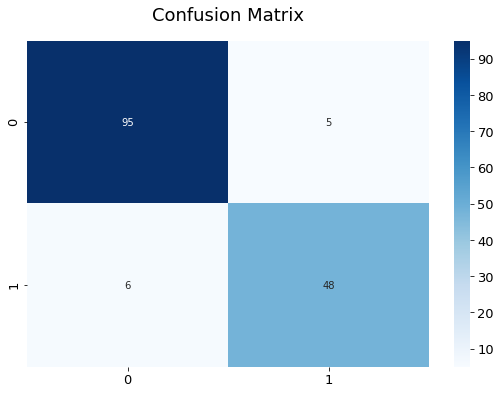

In [14]:
conf_matrix(y_test,prediction1)

Plotting different metrics scores for the Random Forest Classifier for evaluation.

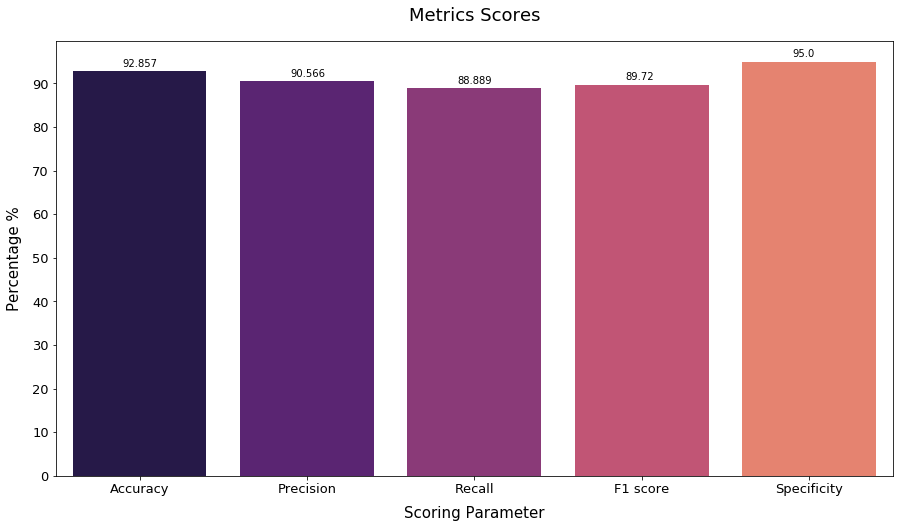

In [15]:
metrics_score(cm1)

Plotting the average of different metrics scores for further evaluation.

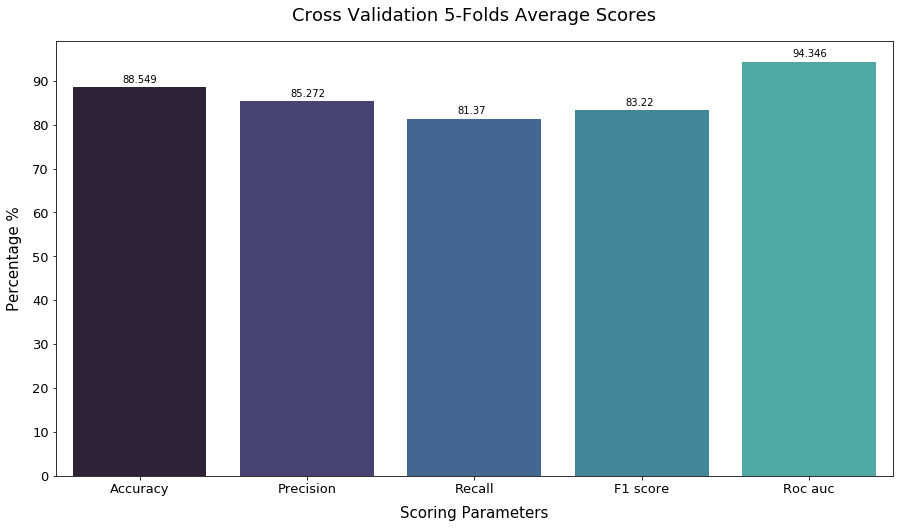

In [16]:
cal_score('Random Forest',rf,5)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of Random Forest Classifier as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between healthy and diabetic patients.

Area under the ROC Curve (AUC): 0.98


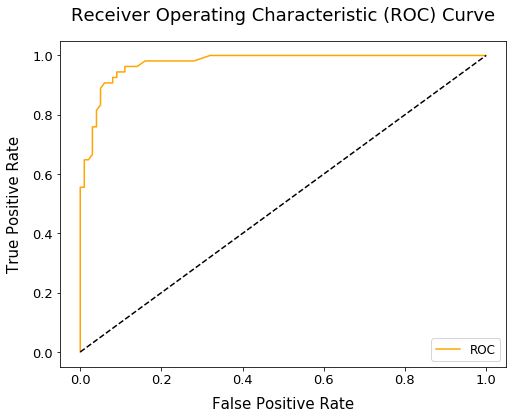

In [17]:
probs = rf.predict_proba(X_test)
probs = probs[:, 1]
auc1 = roc_auc_score(y_test, probs)
roc_auc['Random Forest']=np.round(auc1,3)
print('Area under the ROC Curve (AUC): %.2f' % auc1)
fpr1, tpr1, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr1, tpr1)

Plotting Precision-Recall Curve for different thresholds of precision and recall much like the ROC Curve and showing the Area under the Precision-Recall Curve (AUCPR), it gives the number summary of the information in the Precision-Recall Curve.

Area under the PR Curve (AUCPR): 0.96


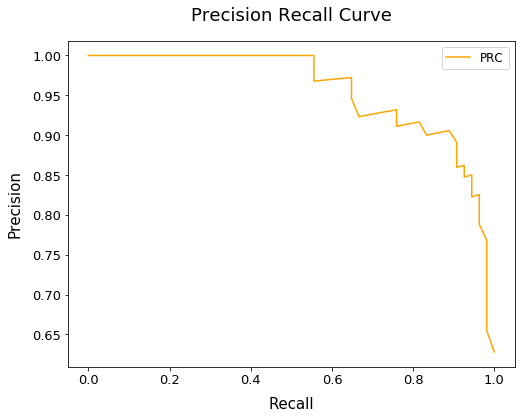

In [18]:
precision1, recall1, _ = precision_recall_curve(y_test, probs)
auc_score1 = auc(recall1, precision1)
pr_auc['Random Forest']=np.round(auc_score1,3)
print('Area under the PR Curve (AUCPR): %.2f' % auc_score1)
plot_precision_recall_curve(recall1, precision1)

### 3.2. Decision Tree

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)
dtc = DecisionTreeClassifier(random_state = 5)
dtc.fit(X_train, y_train)
prediction2 = dtc.predict(X_test)
accuracy2 = dtc.score(X_test, y_test)
print ('Model Accuracy:',accuracy2 * 100)

Model Accuracy: 92.20779220779221


Storing model accuracy to plot for comparison with other Machine Learning models.

In [20]:
accuracies['Decision Tree'] = np.round(accuracy2 * 100,3)

Plotting Confusion Matrix to describe the performance of Decision Tree Classifier on a set of test data.

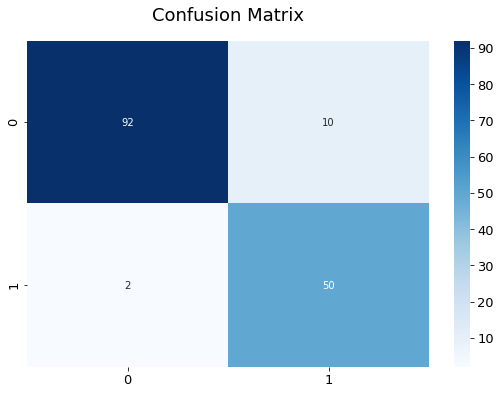

In [21]:
conf_matrix(y_test,prediction2)

Plotting different metrics scores for the Decision Tree Classifier for evaluation.

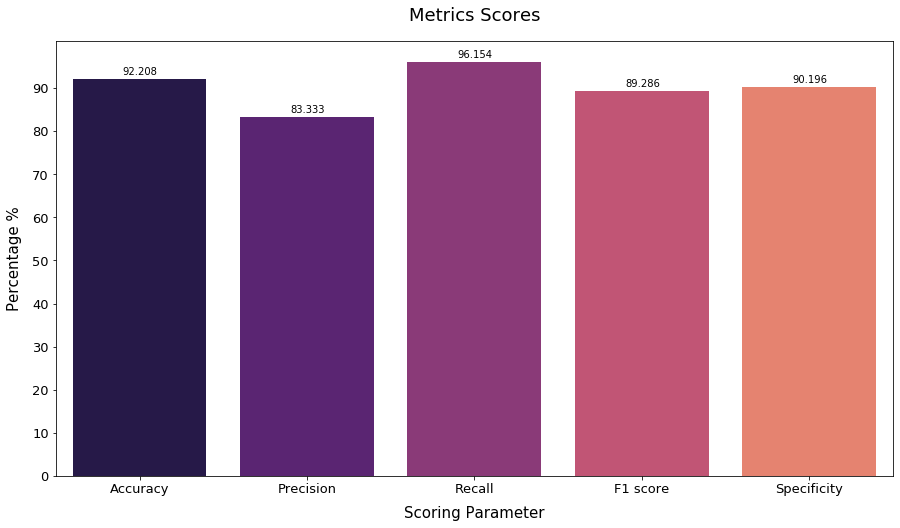

In [22]:
metrics_score(cm1)

Plotting the average scores of different metrics scores for further evaluation.

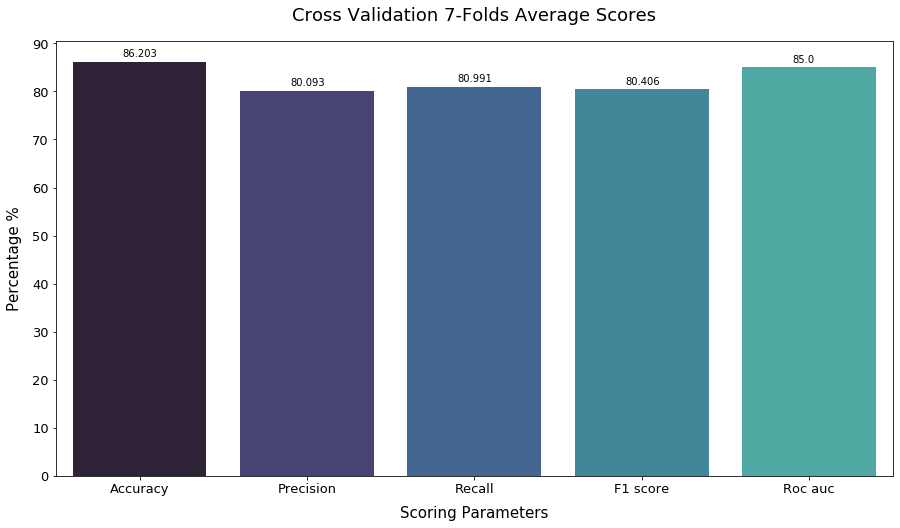

In [23]:
cal_score('Decision Tree',dtc,7)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of Decision Tree Classifier as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between healthy and diabetic patients.

Area under the ROC Curve (AUC): 0.93


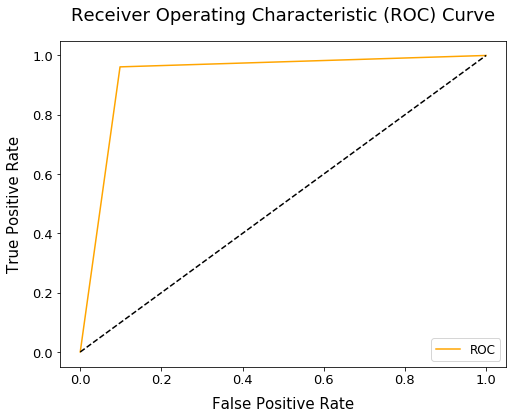

In [24]:
probs = dtc.predict_proba(X_test)
probs = probs[:, 1]
auc2 = roc_auc_score(y_test, probs)
roc_auc['Decision Tree']=np.round(auc2,3)
print('Area under the ROC Curve (AUC): %.2f' % auc2)
fpr2, tpr2, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr2, tpr2)

Plotting Precision-Recall Curve for different thresholds of precision and recall much like the ROC Curve and showing the Area under the Precision-Recall Curve (AUCPR), it gives the number summary of the information in the Precision-Recall Curve.

Area under the PR Curve (AUCPR): 0.90


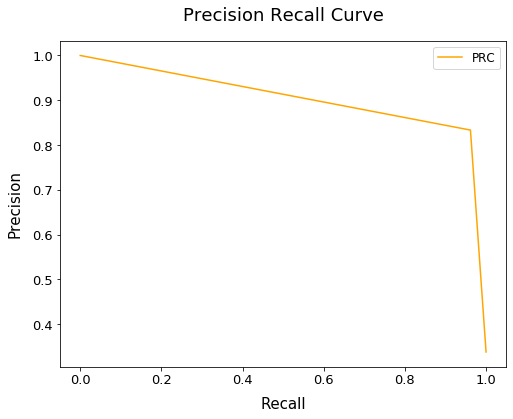

In [25]:
precision2, recall2, _ = precision_recall_curve(y_test, probs)
auc_score2 = auc(recall2, precision2)
pr_auc['Decision Tree']=np.round(auc_score2,3)
print('Area under the PR Curve (AUCPR): %.2f' % auc_score2)
plot_precision_recall_curve(recall2, precision2)

### 3.3. Gradient Boosting

Gradient Boosting builds an additive model in a forward stage-wise fashion. it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)
gb=GradientBoostingClassifier(n_estimators=134,learning_rate=0.2)
gb.fit(X_train, y_train)
prediction3 = gb.predict(X_test)
accuracy3 = gb.score(X_test, y_test)
print ('Model Accuracy:',accuracy3 * 100)

Model Accuracy: 90.25974025974025


Storing model accuracy to plot for comparison with other Machine Learning models.

In [66]:
accuracies['Gradient Boosting'] = np.round(accuracy3 * 100,3)

Plotting Confusion Matrix to describe the performance of Gradient Boosting Classifier on a set of test data.

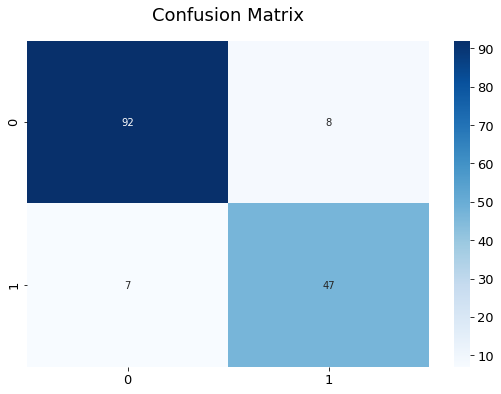

In [67]:
conf_matrix(y_test,prediction3)

Plotting different metrics scores for the Gradient Boosting Classifier for evaluation.

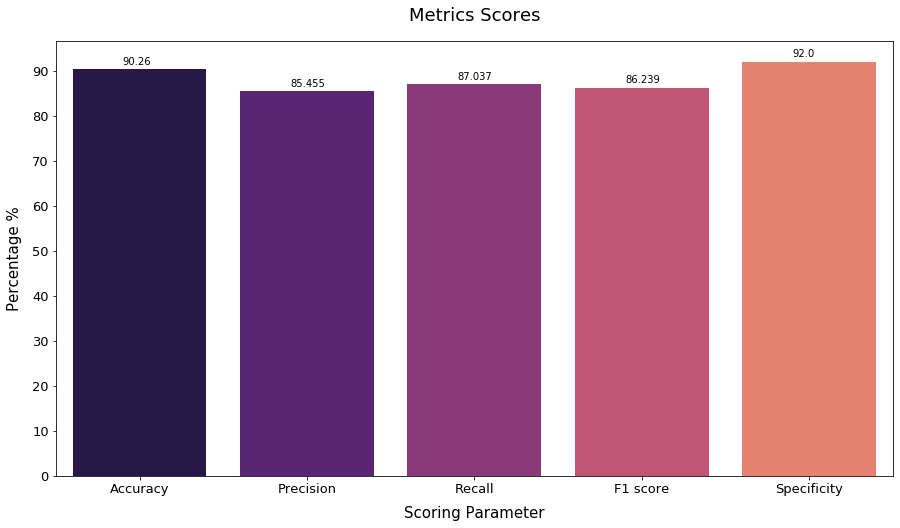

In [68]:
metrics_score(cm1)

Plotting the average scores of different metrics scores for further evaluation.

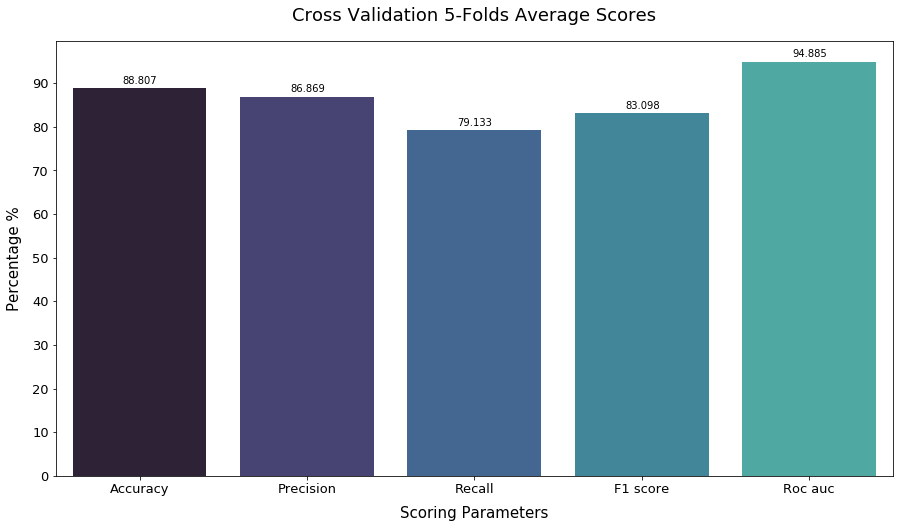

In [69]:
cal_score('Gradient Boosting',gb,5)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of Gradient Boosting Classifier as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between healthy and diabetic patients.

Area under the ROC Curve (AUC): 0.98


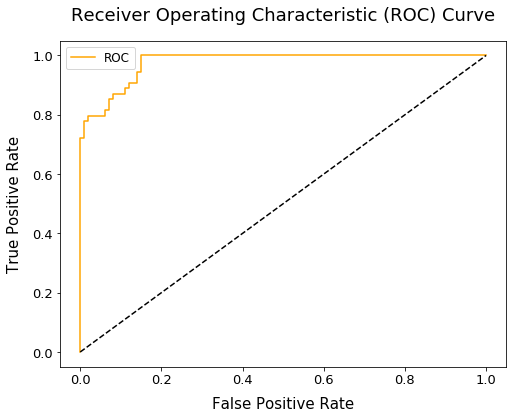

In [70]:
probs = gb.predict_proba(X_test)
probs = probs[:, 1]
auc3 = roc_auc_score(y_test, probs)
roc_auc['Gradient Boosting']=np.round(auc3,3)
print('Area under the ROC Curve (AUC): %.2f' % auc3)
fpr3, tpr3, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr3, tpr3)

Plotting Precision-Recall Curve for different thresholds of precision and recall much like the ROC Curve and showing the Area under the Precision-Recall Curve (AUCPR), it gives the number summary of the information in the Precision-Recall Curve.

Area under the PR Curve (AUCPR): 0.96


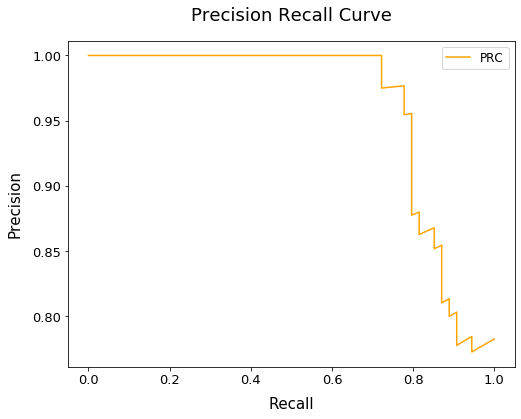

In [71]:
precision3, recall3, _ = precision_recall_curve(y_test, probs)
auc_score3 = auc(recall3, precision3)
pr_auc['Gradient Boosting']=np.round(auc_score3,3)
print('Area under the PR Curve (AUCPR): %.2f' % auc_score3)
plot_precision_recall_curve(recall3, precision3)

### 3.4. K-Nearest Neighbors

KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)
knn = KNeighborsClassifier(n_neighbors =7 )
knn.fit(X_train, y_train)
prediction4 = knn.predict(X_test)
accuracy4 = knn.score(X_test, y_test) 
print ('Model Accuracy:',accuracy4 * 100)

Model Accuracy: 90.25974025974025


Storing model accuracy to plot for comparison with other Machine Learning models.

In [34]:
accuracies['KNN'] = np.round(accuracy4 * 100,3)

Plotting Confusion Matrix to describe the performance of K-Nearest Neighbours Classifier on a set of test data.

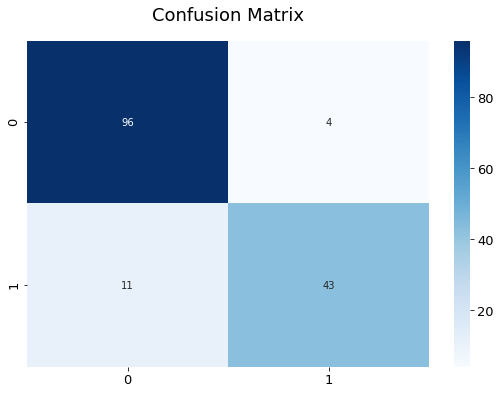

In [35]:
conf_matrix(y_test,prediction4)

Plotting different metrics scores for the K-Nearest Neighbours Classifier for evaluation.

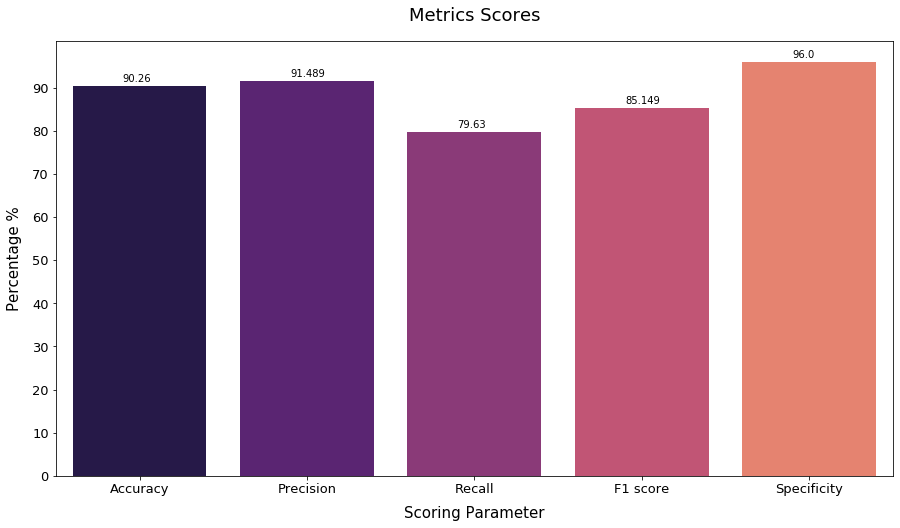

In [36]:
metrics_score(cm1)

Plotting the average scores of different metrics scores for further evaluation.

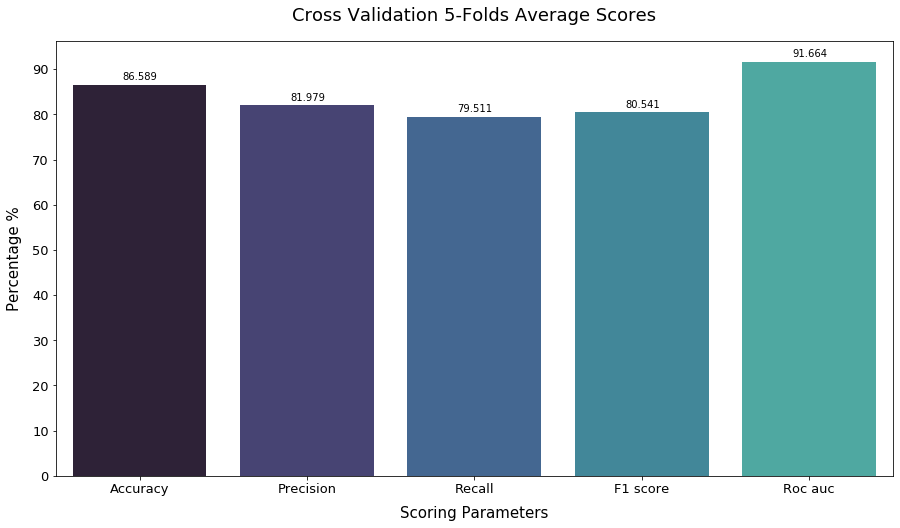

In [37]:
cal_score('KNN',knn,5)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of K-Nearest Neighbours Classifier as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between healthy and diabetic patients.

Area under the ROC Curve (AUC): 0.97


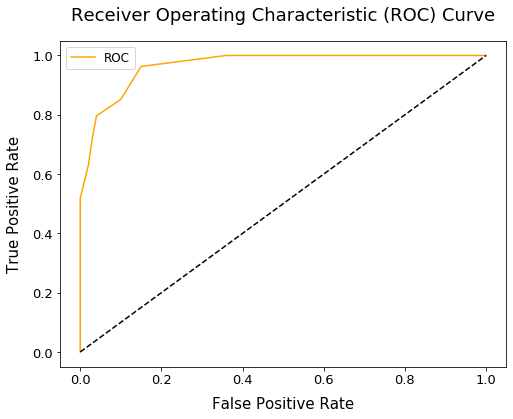

In [38]:
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc4 = roc_auc_score(y_test, probs)
roc_auc['KNN']=np.round(auc4,3)
print('Area under the ROC Curve (AUC): %.2f' % auc4)
fpr4, tpr4, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr4, tpr4)

Plotting Precision-Recall Curve for different thresholds of precision and recall much like the ROC Curve and showing the Area under the Precision-Recall Curve (AUCPR), it gives the number summary of the information in the Precision-Recall Curve.

Area under the PR Curve (AUCPR): 0.94


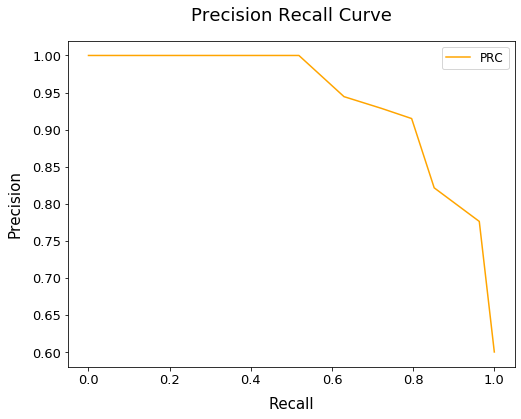

In [39]:
precision4, recall4, _ = precision_recall_curve(y_test, probs)
auc_score4 = auc(recall4, precision4)
pr_auc['KNN']=np.round(auc_score4,3)
print('Area under the PR Curve (AUCPR): %.2f' % auc_score4)
plot_precision_recall_curve(recall4, precision4)

### 3.5. Support Vector Machine

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
prediction5 = svm.predict(X_test)
accuracy5 = svm.score(X_test, y_test) 
print ('Model Accuracy:',accuracy5 * 100)

Model Accuracy: 82.46753246753246


Storing model accuracy to plot for comparison with other Machine Learning models.

In [41]:
accuracies['SVM'] = np.round(accuracy5 * 100,3)

Plotting Confusion Matrix to describe the performance of Support Vector Machine Classifier on a set of test data.

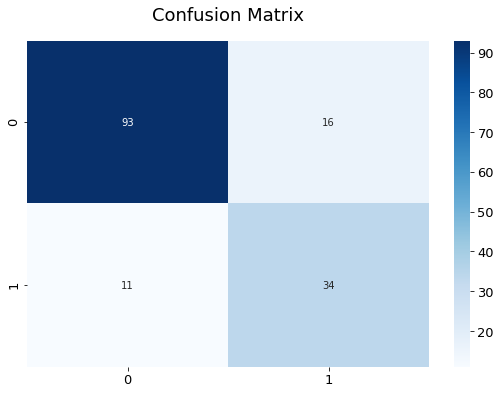

In [42]:
conf_matrix(y_test,prediction5)

Plotting different metrics scores for the Support Vector Machine Classifier for evaluation.

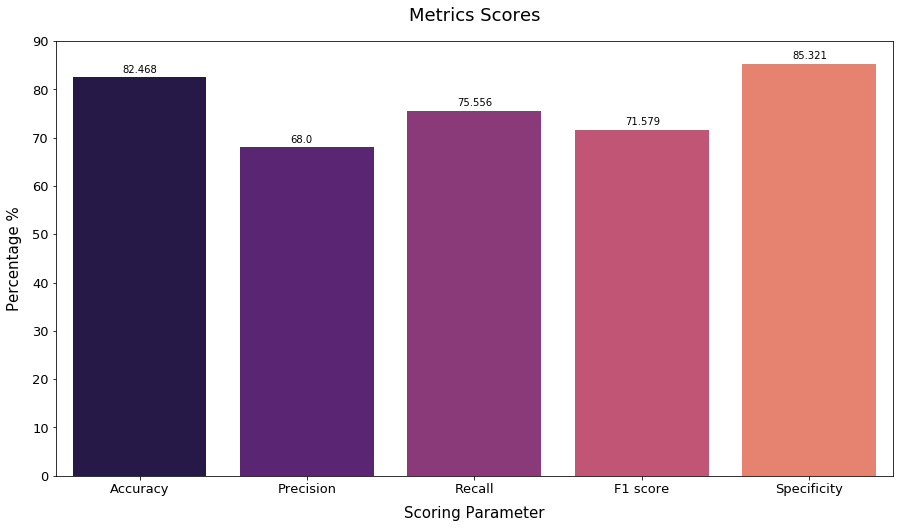

In [43]:
metrics_score(cm1)

Plotting the average scores of different metrics scores for further evaluation.

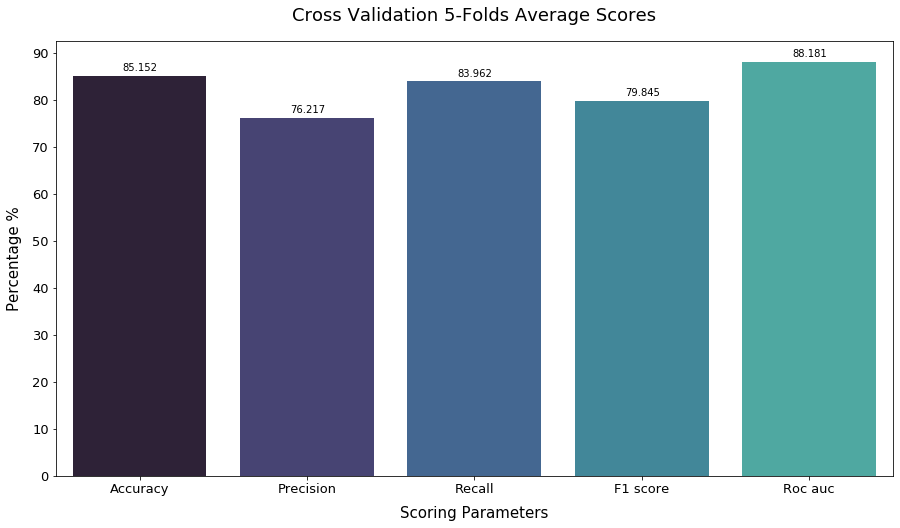

In [44]:
cal_score('SVM',svm,5)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of Support Vector Machine Classifier as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between healthy and diabetic patients.

Area under the ROC Curve (AUC): 0.84


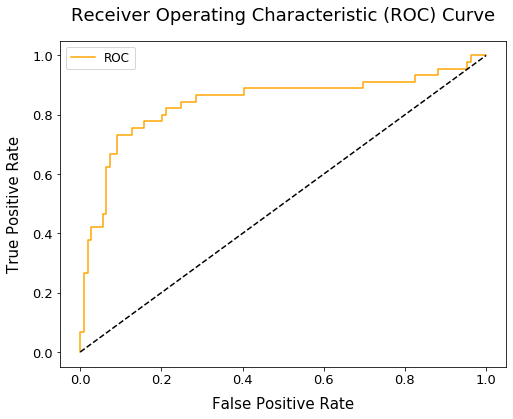

In [45]:
probs = svm.predict_proba(X_test)
probs = probs[:, 1]
auc5 = roc_auc_score(y_test, probs)
roc_auc['SVM']=np.round(auc5,3)
print('Area under the ROC Curve (AUC): %.2f' % auc5)
fpr5, tpr5, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr5, tpr5)

Plotting Precision-Recall Curve for different thresholds of precision and recall much like the ROC Curve and showing the Area under the Precision-Recall Curve (AUCPR), it gives the number summary of the information in the Precision-Recall Curve.

Area under the PR Curve (AUCPR): 0.74


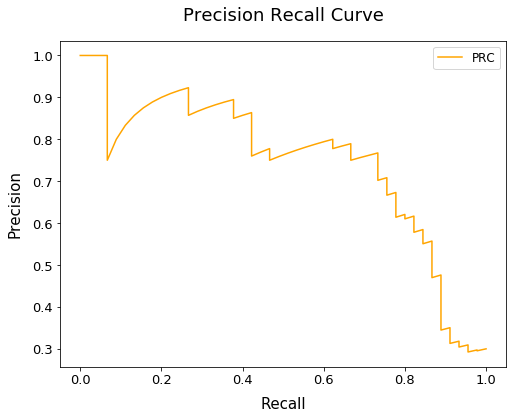

In [46]:
precision5, recall5, _ = precision_recall_curve(y_test, probs)
auc_score5 = auc(recall5, precision5)
pr_auc['SVM']=np.round(auc_score5,3)
print('Area under the PR Curve (AUCPR): %.2f' % auc_score5)
plot_precision_recall_curve(recall5, precision5)

### 3.6. Naive Bayes

A Naive Bayes Classifier is an algorithm that uses Bayes' theorem to classify objects. Naive Bayes classifiers assume strong, or naive, independence between attributes of data points.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5)
gnb = GaussianNB()
gnb.fit(X_train, y_train) 
prediction6 = gnb.predict(X_test) 
accuracy6 = gnb.score(X_test, y_test) 
print ('Model Accuracy:',accuracy6 * 100)

Model Accuracy: 82.46753246753246


Storing model accuracy to plot for comparison with other Machine Learning models.

In [48]:
accuracies['Naive Bayes'] = np.round(accuracy6 * 100,3)

Plotting Confusion Matrix to describe the performance of Naive Bayes Classifier on a set of test data.

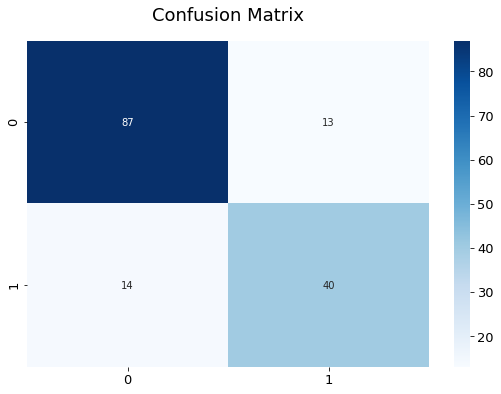

In [49]:
conf_matrix(y_test,prediction6)

Plotting different metrics scores for the Naive Bayes Classifier for evaluation.

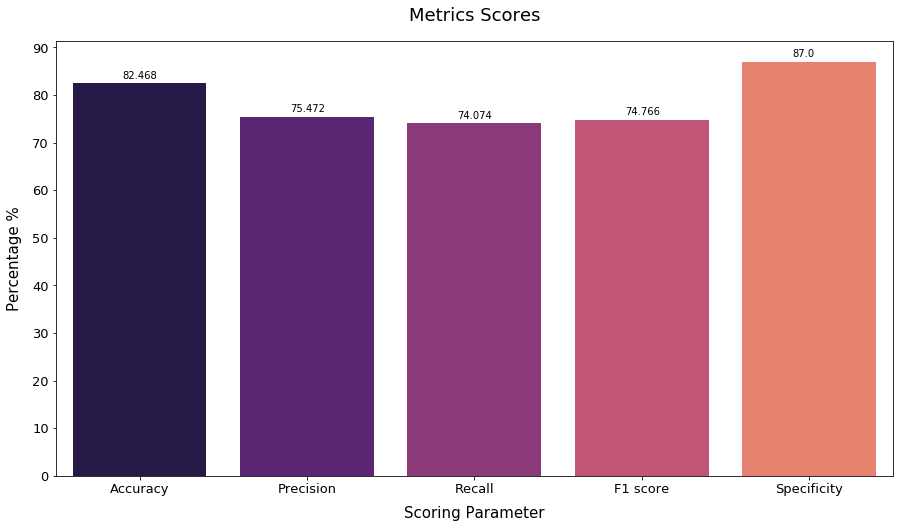

In [50]:
metrics_score(cm1)

Plotting the average scores of different metrics scores for further evaluation.

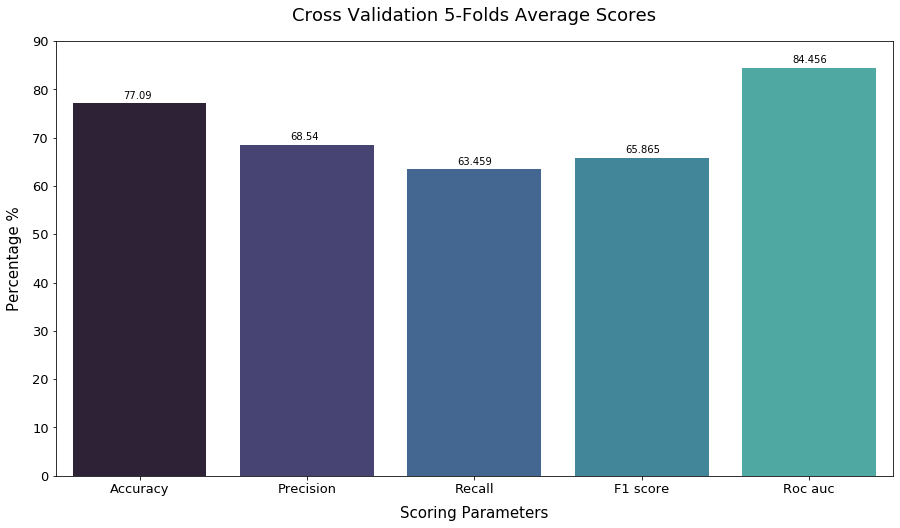

In [51]:
cal_score('Naive Bayes',gnb,5)

Plotting Receiver Operating Characteristic (ROC) Curve, to illustrate the diagnostic ability of Naive Bayes Classifier as its discrimination threshold is varied and showing the Area under the ROC Curve (AUC) value which will tell us how much our model is capable of distinguishing between healthy and diabetic patients.

Area under the ROC Curve (AUC): 0.88


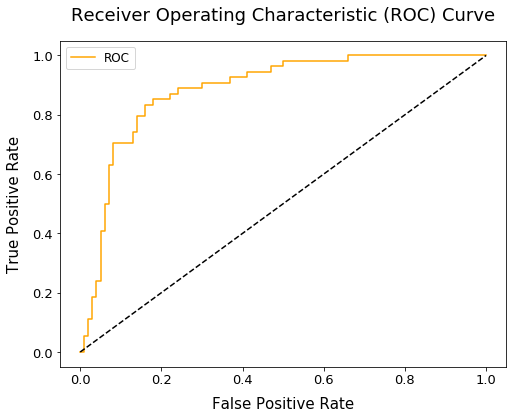

In [52]:
probs = gnb.predict_proba(X_test)
probs = probs[:, 1]
auc6 = roc_auc_score(y_test, probs)
roc_auc['Naive Bayes']=np.round(auc6,3)
print('Area under the ROC Curve (AUC): %.2f' % auc6)
fpr6, tpr6, _ = roc_curve(y_test, probs)
plot_roc_curve(fpr6, tpr6)

Plotting Precision-Recall Curve for different thresholds of precision and recall much like the ROC Curve and showing the Area under the Precision-Recall Curve (AUCPR), it gives the number summary of the information in the Precision-Recall Curve.

Area under the PR Curve (AUCPR): 0.73


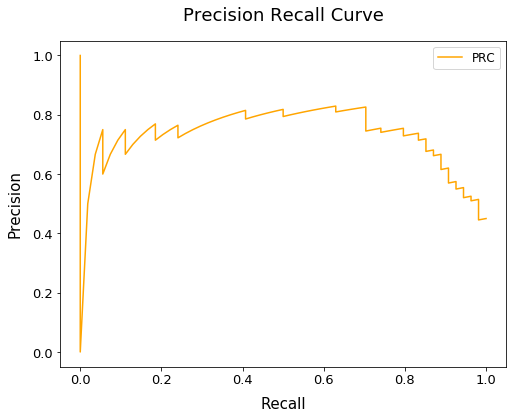

In [53]:
precision6, recall6, _ = precision_recall_curve(y_test, probs)
auc_score6 = auc(recall6, precision6)
pr_auc['Naive Bayes']=np.round(auc_score6,3)
print('Area under the PR Curve (AUCPR): %.2f' % auc_score6)
plot_precision_recall_curve(recall6, precision6)

## 4. Performance Comparison

Plotting the accuracy metric score of the machine learning models for comparison.

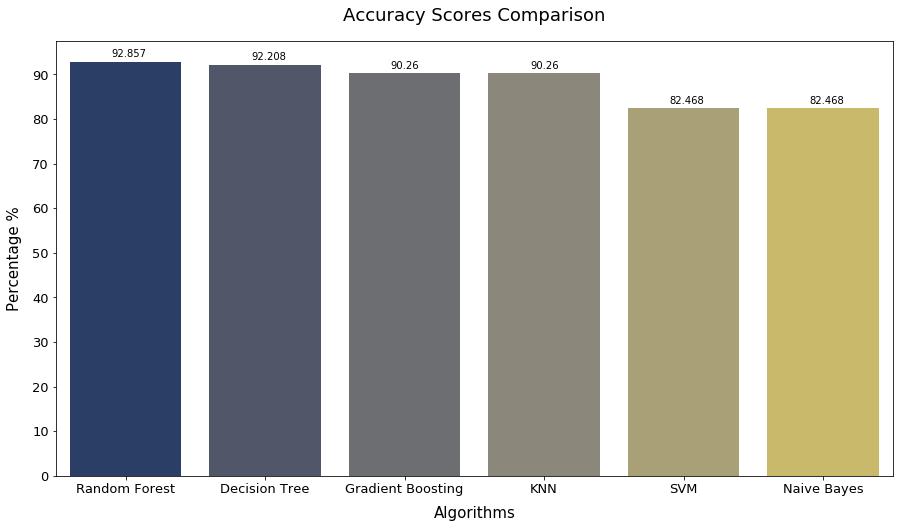

In [72]:
plt.figure(figsize=(15,8))
sns.set_palette('cividis')
ax=sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Percentage %',labelpad=10)
plt.xlabel('Algorithms',labelpad=10)
plt.title('Accuracy Scores Comparison',pad=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
plt.show()

We can see that Random Forest Classifier shows the highest accuracy score of 92.857 followed by Decision Tree Classifier with an accuracy score of 92.208

Plotting the average accuracy metric score of the machine learning models for comparison.

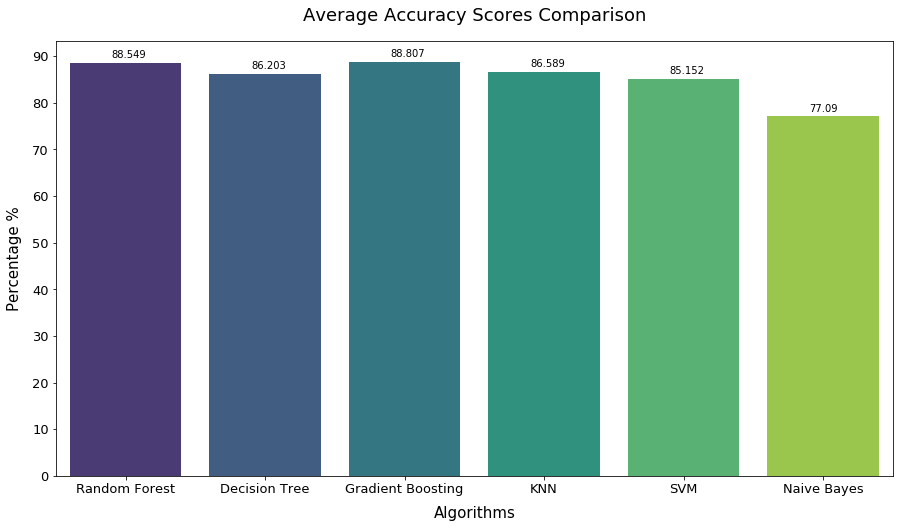

In [73]:
plt.figure(figsize=(15,8))
sns.set_palette('viridis')
ax=sns.barplot(x=list(avg_accuracies.keys()),y=list(avg_accuracies.values()))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Percentage %',labelpad=10)
plt.xlabel('Algorithms',labelpad=10)
plt.title('Average Accuracy Scores Comparison',pad=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
plt.show()

We can see that Gradient Boosting Classifier shows the highest average accuracy score of 88.807 followed by Random Forest Classifier with an average accuracy score of 88.549

Plotting the ROC Curve of the machine learning models for comparison.

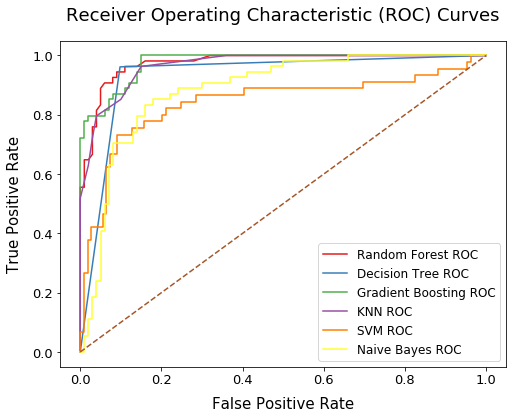

In [74]:
plt.figure(figsize=(8,6))
sns.set_palette('Set1')
plt.plot(fpr1, tpr1, label='Random Forest ROC')
plt.plot(fpr2, tpr2, label='Decision Tree ROC')
plt.plot(fpr3, tpr3, label='Gradient Boosting ROC')
plt.plot(fpr4, tpr4, label='KNN ROC')
plt.plot(fpr5, tpr5, label='SVM ROC')
plt.plot(fpr6, tpr6, label='Naive Bayes ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('True Positive Rate',labelpad=10)
plt.xlabel('False Positive Rate',labelpad=10)
plt.title('Receiver Operating Characteristic (ROC) Curves',pad=20)
plt.legend()
plt.show()

Plotting the AUC values of ROC Curve of the machine learning models for comparison.

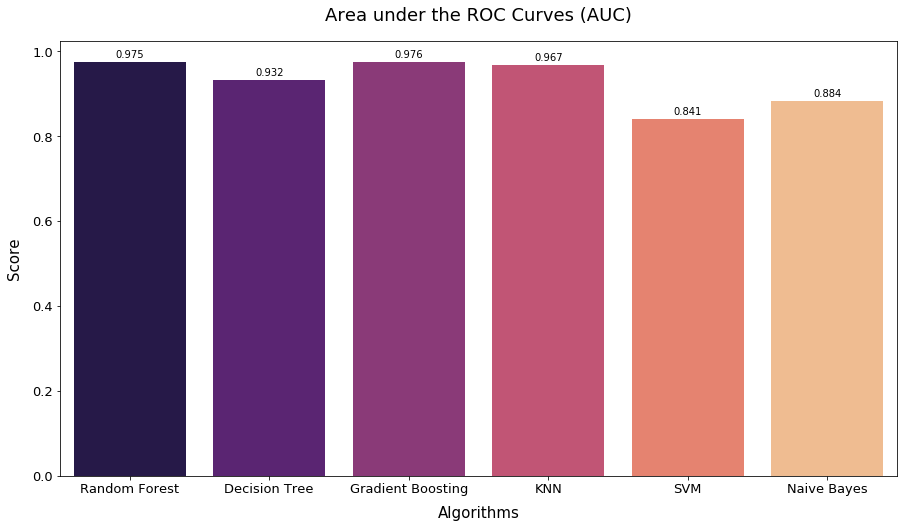

In [75]:
plt.figure(figsize=(15,8))
sns.set_palette('magma')
ax=sns.barplot(x=list(roc_auc.keys()),y=list(roc_auc.values()))
#plt.yticks(np.arange(0,100,10))
plt.ylabel('Score',labelpad=10)
plt.xlabel('Algorithms',labelpad=10)
plt.title('Area under the ROC Curves (AUC)',pad=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+0.01))
plt.show()

We can see that Gradient Boosting Classifier shows the highest AUC score of 0.976 followed by Random Forest Classifier with an AUC score of 0.975

Plotting the PR Curve of the machine learning models for comparison.

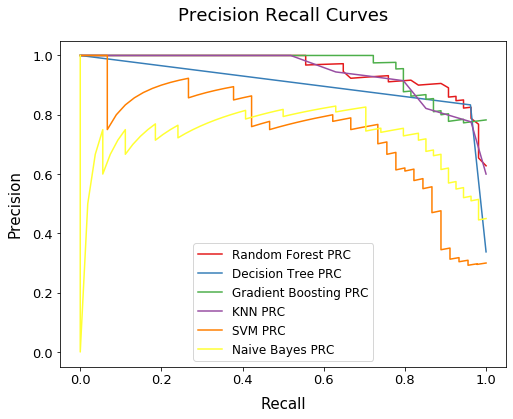

In [76]:
plt.figure(figsize=(8,6))
sns.set_palette('Set1')
plt.plot(recall1, precision1, label='Random Forest PRC')
plt.plot(recall2, precision2, label='Decision Tree PRC')
plt.plot(recall3, precision3, label='Gradient Boosting PRC')
plt.plot(recall4, precision4, label='KNN PRC')
plt.plot(recall5, precision5, label='SVM PRC')
plt.plot(recall6, precision6, label='Naive Bayes PRC')
plt.ylabel('Precision',labelpad=10)
plt.xlabel('Recall',labelpad=10)
plt.title('Precision Recall Curves',pad=20)
plt.legend()
plt.show()

Plotting the AUC values of PR Curve of the machine learning models for comparison.

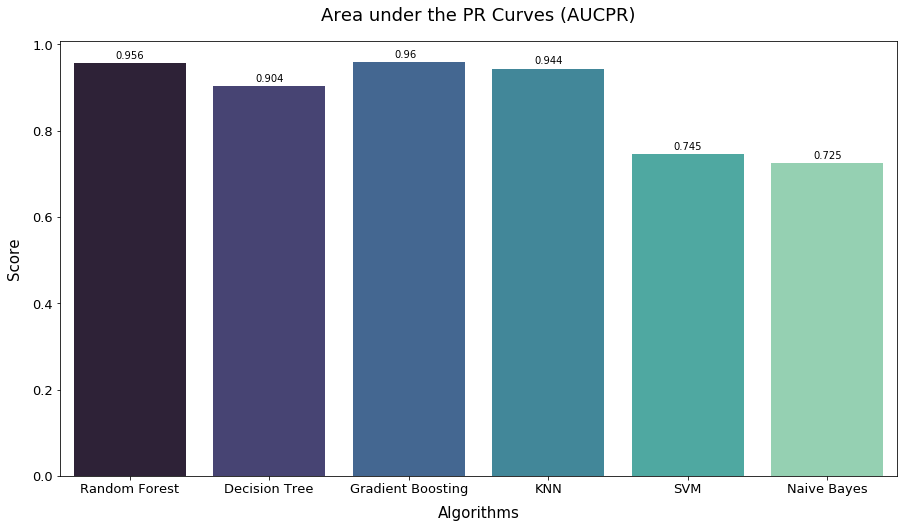

In [77]:
plt.figure(figsize=(15,8))
sns.set_palette('mako')
ax=sns.barplot(x=list(pr_auc.keys()),y=list(pr_auc.values()))
plt.ylabel('Score',labelpad=10)
plt.xlabel('Algorithms',labelpad=10)
plt.title('Area under the PR Curves (AUCPR)',pad=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+0.01))
plt.show()

We can see that Gradient Boosting Classifier shows the highest AUCPR score of 0.96 followed by Random Forest Classifier with an AUC score of 0.956

By analyzing the above results we can see that Random Forest and Gradient Boosting Classifer are both giving some what similar performance to each other and show better results than other machine learning algorithms.